In [10]:
#Stage 1: Sentiment, Category
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Load data with specified delimiter, header row, and encoding
try:
    complaints_data = pd.read_csv('lms.csv', sep=';', quoting=csv.QUOTE_MINIMAL, error_bad_lines=False, encoding='latin1')
except FileNotFoundError:
    print("Error: File 'lms.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'lms.csv' is empty.")

# Textex Preprocessing for Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    return text

text_column = 'Masukan dan Saran'  # Replace 'your_column_name' with the actual column name

# Check if text column exists in the DataFrame
if text_column in complaints_data.columns:
    # Fill empty values or whitespaces with 'ok'
    complaints_data[text_column] = complaints_data[text_column].fillna('ok')
    # Apply enhanced text preprocessing
    complaints_data[text_column] = complaints_data[text_column].apply(lambda x: preprocess_text(x))
else:
    print(f"Error: '{text_column}' column not found in DataFrame. Check your CSV file and column names.")

# Categorize data into appropriate problem categories
CATEGORY_MAPPING = {
    'Video': ['company coaching','vidio', 'rekaman waktu video coaching', 'pembawaan presentasi', 'materi lewat video', 'presentasi', 'video', 'tutorial video', 'rekaman', 'kualitas video'],
    'Article Review': ['modul','module','materi bisa lebih', 'e-learning', 'dokumen', 'article', 'pdf', 'materi', 'bahasa', 'tutorial', 'panduan', 'reading'],
    'Reminder': ['h-1', 'direminder', 'pemberitahuan', 'pemberitahuan live mentoring', 'reminder', 'pengingat', 'jadwal', 'deadline', 'email', 'e-mail'],
    'Mentoring': ['pengajaran','mentoring', 'gaya mengajar', 'gaya', 'bimbingan', 'tutorial langsung', 'durasi mentoring'],
    'Final Task': ['praktik','praktek','kuis','projek', 'template', 'bagian akhir', 'final project', 'project', 'final', 'tool', 'tools', 'proyek akhir', 'pekerjaan akhir', 'studi kasus', 'case study', 'case'],
    'Task 1-4': ['task', 'checklist', 'ujian', 'berikan task', 'weekly task', 'task yang tidak ada dalam materi', 'tolong berikan tugas', 'perbanyak task', 'banyak task', 'penugasan', 'soal', 'tugas', 'pengerjaan', 'problem set', 'task kurang', 'tugas kurang', 'tidak singkron', 'intruksi tugas', 'petunjuk pengerjaan tugas'],
    'Website': ['web','site','page','crad','card'],
    'Community': ['berbagi','ruang','respon', 'engagement', 'networking', 'discord', 'telegram', 'grup', 'komunitas', 'forum', 'kelompok', 'diskusi', 'karir']
}

# New category mapping for 'positive' and 'negative'
CATEGORY_MAPPING_2 = {
    'Negative': ['sebak','sebaiknya','reminder','perbanyak','cepat','more','minta','memperbanyak','jaringan','monoton','menoton''waktu','mungkin','tambah','kurang','susah','saran','buat','beri','update','upgrade','no improvement','perlu','ngaret','memperbaiki','diganti','gantikan','ditampilin','tampilkan','tampilin','diutamain','diutamakan','utamain','utamakan','harap','perjelas','harusnya','harus','kedepannya','perbaiki','slow','tolong','lebih','butuh','tingkatkan','payah','lain kali','buruk','maybe', 'instead', 'seharusnya', 'terkadang', 'error', 'eror', 'mungkin bisa', 'menyesal', 'rugi', 'sedih', 'kesal', 'jika', 'andai', 'harusnya', 'kecewa', 'perbaiki', 'diperbaiki','kesel'],
    'Positive': ['relate','lengkap','pertahankan','sudah sangat baik','sudah baik','puas','sangat puas','on time','pertahankan','sesuai harapan','sesuai','memuaskan','', '      ', 'cukup', 'berharga', 'yang baik', 'bersemangat', 'tidak ada', 'baik', 'keren', 'bagus', '-', ' ', 'terimakasih', 'ok', 'oke', 'nope', 'sip', 'membantu', 'good', 'good work']
}

#Problem Phrase: Belum ada saran,belum ada masukan, kalau bisa

def categorize_sentiment(text):
    for sentiment, keywords in CATEGORY_MAPPING_2.items():
        for keyword in keywords:
                return sentiment
    return 'Other'

def categorize_sentiment(text):
    for sentiment, keywords in CATEGORY_MAPPING_2.items():
        for keyword in keywords:
            if keyword in text.lower():
                return sentiment
    return 'Other'
# Define the categorize_category function
def categorize_category(text):
    for category, keywords in CATEGORY_MAPPING.items():
        if any(keyword in text.lower() for keyword in keywords):
            return category
    return 'Other'
                   

# Add 'Sentiment' column
complaints_data['Sentiment'] = complaints_data[text_column].apply(categorize_sentiment)

# Add 'Category' column
complaints_data['Category'] = complaints_data[text_column].apply(categorize_category)

# Save the updated DataFrame to an Excel file
complaints_data.to_excel('processed_lms.csv.xlsx', index=False)

# Rename the first column to 'Batch'
complaints_data.columns.values[0] = 'Batch'

# Plotting
plt.rcParams['font.family'] = 'DejaVu Sans'  # Fallback to a system font if 'Roboto' is not found
plt.rcParams['font.size'] = 12

# Pie chart for Sentiment
sentiment_counts = complaints_data['Sentiment'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1,) * len(sentiment_counts)  # Equal explosion for all slices
plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Percentage of Sentiment')
plt.show()

# Bar chart for Category excluding 'Positive'
category_counts = complaints_data[complaints_data['Sentiment'] != 'Positive']['Category'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Complaints in Each Category (Excluding Positive Sentiment)')
plt.xlabel('Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


b'Skipping line 1487: expected 1 fields, saw 2\nSkipping line 1944: expected 1 fields, saw 2\nSkipping line 2078: expected 1 fields, saw 2\n'


ParserError: Error tokenizing data. C error: EOF inside string starting at row 2147

In [35]:
# Stage 2: Aspect
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud

# Load data with specified delimiter, header row, and encoding
try:
    complaints_data = pd.read_csv('processed_lms.xlsx', sep=',', quoting=csv.QUOTE_MINIMAL, error_bad_lines=False, encoding='latin1')
except FileNotFoundError:
    print("Error: File 'processed_lms.xlsx' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'processed_lms.xlsx' is empty.")

# Text Preprocessing for Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    return text

text_column = 'Masukan dan Saran'

# Check if text column exists in the DataFrame
if text_column in complaints_data.columns:
    complaints_data[text_column] = complaints_data[text_column].fillna('ok')
    complaints_data[text_column] = complaints_data[text_column].apply(lambda x: preprocess_text(x))
else:
    print(f"Error: '{text_column}' column not found in DataFrame. Check your CSV file and column names.")

# Categorize data into appropriate problem categories
CATEGORY_MAPPING = {
            'Bahasa': ['terjemahan', 'translate', 'inggris', 'bahasa'],
            'Kurikulum': ['up-to-date', 'up to date', 'mengerti', 'sulit', 'paham', 'materi'],
            'Presentasi': ['presentasi', 'pemaparan'],
            'Kualitas Video': ['video'],
            'Urutan Task': ['urutan task', 'urut'],
            'Teknis Task': ['check box'],
            'Telegram': ['telegram'],
            'E-mail': ['mail'],
            'Website': ['web'],
            'Mentor': ['mentor'],
            'Durasi': ['timeline', 'time line', 'durasi', 'lama', 'cepat', 'deadline', 'telat'],
            'Project': ['project', 'proyek', 'study case', 'projek'],
            'Grup per Program': ['diskusi', 'grup', 'group'],
            'Admin': ['cs', 'cso', 'admin']
        }
# Function to categorize the 'Aspect'
def categorize_aspect(text):
    aspects = []
    for category, keywords in CATEGORY_MAPPING.items():
        if any(keyword in text.lower() for keyword in keywords):
            aspects.append(category)
    return ', '.join(aspects) if aspects else 'Other'

# Add 'Aspect' column
complaints_data['Aspect'] = complaints_data[text_column].apply(categorize_aspect)

# Save the updated DataFrame to an Excel file
complaints_data.to_excel('processed_lms_2.csv.xlsx', index=False)


b'Skipping line 4: expected 1 fields, saw 2\nSkipping line 6: expected 1 fields, saw 2\nSkipping line 7: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 2\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 13: expected 1 fields, saw 2\nSkipping line 15: expected 1 fields, saw 2\nSkipping line 16: expected 1 fields, saw 7\nSkipping line 24: expected 1 fields, saw 3\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 30: expected 1 fields, saw 3\nSkipping line 36: expected 1 fields, saw 2\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 43: expected 1 fields, saw 2\nSkipping line 46: expected 1 fields, saw 5\nSkipping line 49: expected 1 fields, saw 2\nSkipping line 52: expected 1 fields, saw 2\nSkipping line 54: expected 1 fields, saw 2\nSkipping line 59: expected 1 fields, saw 4\nSkipping line 61: expected 1 fields, saw 2\nSkipping line 65: expected 1 fields, saw 3\nSkipping line 66: expected 1 fields, saw 3\nSkipping line 71: expected 1 fiel

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [1]:
#NEW Update terkait update sentiment analysis menggunakan Pertanyaan 14

In [11]:
import pandas as pd

# Load the Excel file into a DataFrame with error-handling
file_path = 'lms.xlsx'
df = pd.read_excel(file_path, error_bad_lines=False)

# Print the column names to inspect them
print(df.columns)

# Check if 'Masukan dan Saran' is in the columns
if 'Masukan dan Saran' in df.columns:
    # Drop rows with missing values in the 'Masukan dan Saran' column
    df = df.dropna(subset=['Masukan dan Saran'])

    # Reset the index after dropping rows
    df = df.reset_index(drop=True)

    # Define your category mapping with keywords
    category_mapping = {
    'Video': ['company coaching','vidio', 'rekaman waktu video coaching', 'pembawaan presentasi', 'materi lewat video', 'presentasi', 'video', 'tutorial video', 'rekaman', 'kualitas video'],
    'Article Review': ['artikel','modul','module','materi bisa lebih', 'e-learning', 'dokumen', 'article', 'pdf', 'bahasa', 'tutorial', 'panduan', 'reading'],
    'Reminder': ['h-1', 'direminder', 'pemberitahuan', 'pemberitahuan live mentoring', 'reminder', 'pengingat', 'jadwal', 'deadline', 'email', 'e-mail'],
    'Mentoring': ['pengajaran','mentoring', 'gaya mengajar', 'gaya', 'bimbingan', 'tutorial langsung', 'durasi mentoring'],
    'Final Task': ['praktik','praktek','kuis','projek', 'template', 'bagian akhir', 'final project', 'project', 'final', 'tool', 'tools', 'proyek akhir', 'pekerjaan akhir', 'studi kasus', 'case study', 'case'],
    'Task 1-4': ['task', 'checklist', 'ujian', 'berikan task', 'weekly task', 'task yang tidak ada dalam materi', 'tolong berikan tugas', 'perbanyak task', 'banyak task', 'penugasan', 'soal', 'tugas', 'pengerjaan', 'problem set', 'task kurang', 'tugas kurang', 'tidak singkron', 'intruksi tugas', 'petunjuk pengerjaan tugas'],
    'Website': ['web','site','page','crad','card'],
    'Community': ['berbagi','ruang','respon', 'engagement', 'networking', 'discord', 'telegram', 'grup', 'komunitas', 'forum', 'kelompok', 'diskusi', 'karir']
}

    # Function to categorize text based on keywords
    def categorize_text(text):
        for category, keywords in category_mapping.items():
            for keyword in keywords:
                if keyword.lower() in text.lower():
                    return category
        return 'Uncategorized'

    # Apply the categorization function to the 'Masukan dan Saran' column
    df['Category'] = df['Masukan dan Saran'].apply(categorize_text)

    # Save the processed DataFrame to a new Excel file with formatting options
    processed_file_path = 'processed_lms.xlsx'

    # Create a Pandas Excel writer using the 'openpyxl' engine
    with pd.ExcelWriter(processed_file_path, engine='openpyxl') as writer:
        # Write the DataFrame to the Excel file
        df.to_excel(writer, index=False)

        # Get the xlsxwriter workbook and worksheet objects
        workbook = writer.book
        worksheet = writer.sheets['Sheet1']  # Adjust the sheet name as needed

        # Add additional formatting options if desired
        # For example, you can set the column widths
        column_widths = {'A': 20, 'B': 30, 'C': 15}  # Adjust column widths as needed
        for col, width in column_widths.items():
            worksheet.column_dimensions[col].width = width

    # Display the first few rows of the processed DataFrame
    print(df.head())
else:
    print("Column 'Masukan dan Saran' not found in the DataFrame.")


Index(['Masukan dan Saran'], dtype='object')
                                   Masukan dan Saran       Category
0  Alasan saya adalah, dari segi materi seperti C...          Video
1                                                  -  Uncategorized
2  Memotivasi saya untuk menggali kemampuan saya ...     Final Task
3                                                  -  Uncategorized
4  Saya menjadi sangat termotivasi untuk menjadi ...  Uncategorized


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame with error-handling
file_path = 'lms.xlsx'
df = pd.read_excel(file_path, error_bad_lines=False)

# Print the column names to inspect them
print(df.columns)

# Check if 'Masukan dan Saran' is in the columns
if 'Masukan dan Saran' in df.columns:
    # Drop rows with missing values in the 'Masukan dan Saran' column
    df = df.dropna(subset=['Masukan dan Saran'])

    # Reset the index after dropping rows
    df = df.reset_index(drop=True)

    # Categorize data into appropriate problem categories
    CATEGORY_MAPPING = {
        'Bahasa': ['terjemahan', 'translate', 'inggris', 'bahasa'],
        'Kurikulum': ['up-to-date', 'up to date', 'mengerti', 'sulit', 'paham', 'materi'],
        'Presentasi': ['presentasi', 'pemaparan'],
        'Kualitas Video': ['video'],
        'Urutan Task': ['urutan task', 'urut'],
        'Teknis Task': ['check box'],
        'Telegram': ['telegram'],
        'E-mail': ['mail'],
        'Website': ['web'],
        'Mentor': ['mentor'],
        'Durasi': ['timeline', 'time line', 'durasi', 'lama', 'cepat', 'deadline', 'telat'],
        'Project': ['project', 'proyek', 'study case', 'projek'],
        'Grup per Program': ['diskusi', 'grup', 'group'],
        'Admin': ['cs', 'cso', 'admin']
    }

    # Function to categorize the 'Aspect'
    def categorize_aspect(text):
        aspects = []
        for category, keywords in CATEGORY_MAPPING.items():
            if any(keyword in text.lower() for keyword in keywords):
                aspects.append(category)
        return ', '.join(aspects) if aspects else 'Other'

    # Add 'Aspect' column with comma-separated values
    df['Aspect'] = df['Masukan dan Saran'].apply(categorize_aspect)
    
    # Save the updated DataFrame to an Excel file
    df.to_excel('processed_lms_category.xlsx', index=False)
    
    # Display the first few rows of the processed DataFrame
    print(df.head())
else:
    print("Column 'Masukan dan Saran' not found in the DataFrame.")

   

Index(['Masukan dan Saran'], dtype='object')
                                   Masukan dan Saran  \
0  Alasan saya adalah, dari segi materi seperti C...   
1                                                  -   
2  Memotivasi saya untuk menggali kemampuan saya ...   
3                                                  -   
4  Saya menjadi sangat termotivasi untuk menjadi ...   

                              Aspect  
0  Kurikulum, Kualitas Video, Mentor  
1                              Other  
2                            Project  
3                              Other  
4                              Other  


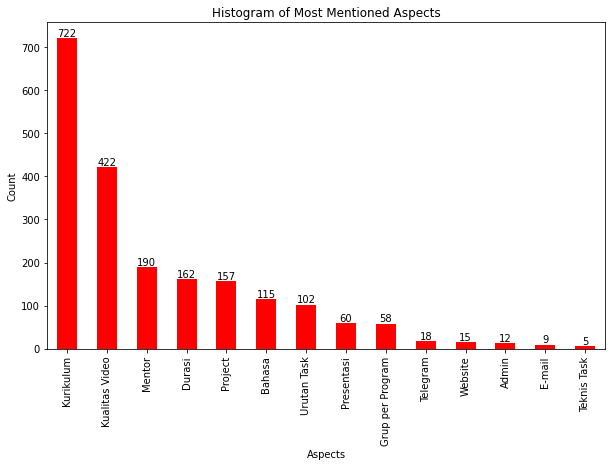

                                     Masukan dan Saran          Aspect
247  - Case yang diberikan sebenarnya bisa saya dap...       Kurikulum
247  - Case yang diberikan sebenarnya bisa saya dap...     Urutan Task
247  - Case yang diberikan sebenarnya bisa saya dap...         Project
248  - untuk task mungkin lebih diberikan cara peng...       Kurikulum
248  - untuk task mungkin lebih diberikan cara peng...  Kualitas Video


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame with error-handling
file_path = 'lms.xlsx'
df = pd.read_excel(file_path, error_bad_lines=False)

# Check if 'Masukan dan Saran' is in the columns
if 'Masukan dan Saran' in df.columns:
    # Drop rows with missing values in the 'Masukan dan Saran' column
    df = df.dropna(subset=['Masukan dan Saran'])

    # Reset the index after dropping rows
    df = df.reset_index(drop=True)

    # Categorize data into appropriate problem categories
    CATEGORY_MAPPING = {
        'Bahasa': ['terjemahan', 'translate', 'inggris', 'bahasa'],
        'Kurikulum': ['up-to-date', 'up to date', 'mengerti', 'sulit', 'paham', 'materi'],
        'Presentasi': ['presentasi', 'pemaparan'],
        'Kualitas Video': ['video'],
        'Urutan Task': ['urutan task', 'urut'],
        'Teknis Task': ['check box'],
        'Telegram': ['telegram'],
        'E-mail': ['mail'],
        'Website': ['web'],
        'Mentor': ['mentor'],
        'Durasi': ['timeline', 'time line', 'durasi', 'lama', 'cepat', 'deadline', 'telat'],
        'Project': ['project', 'proyek', 'study case', 'projek'],
        'Grup per Program': ['diskusi', 'grup', 'group'],
        'Admin': ['cs', 'cso', 'admin']
    }

    # Function to categorize the 'Aspect'
    def categorize_aspect(text):
        aspects = []
        for category, keywords in CATEGORY_MAPPING.items():
            if any(keyword in text.lower() for keyword in keywords):
                aspects.append(category)
        return ', '.join(aspects) if aspects else 'Other'

    # Add 'Aspect' column
    df['Aspect'] = df['Masukan dan Saran'].apply(categorize_aspect)

    # Split multiple categories into separate rows
    df = df.assign(Aspect=df['Aspect'].str.split(', ')).explode('Aspect')

    # Exclude 'Other' category
    df = df[df['Aspect'] != 'Other']

    # Count the most mentioned aspects
    most_mentioned_aspects = df['Aspect'].value_counts().sort_values(ascending=False)

    # Plot the histogram in red with count labels
    plt.figure(figsize=(10, 6))
    ax = most_mentioned_aspects.plot(kind='bar', color='red')
    plt.title('Histogram of Most Mentioned Aspects')
    plt.xlabel('Aspects')
    plt.ylabel('Count')

    # Add count labels on each bar
    for i, count in enumerate(most_mentioned_aspects):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

    plt.show()

    # Display the first few rows of the processed DataFrame
    print(df.head())
else:
    print("Column 'Masukan dan Saran' not found in the DataFrame.")
